# Playground

In [22]:
import numpy as np
import networkx as nx
import csv
import matplotlib.pyplot as plt
from random import random
import os

In [3]:
np.set_printoptions(precision=3)
n=10
p=0.1

A_prob = np.random.rand(n,n)
print(A_prob)

A = (A_prob < p).astype('int')
print(A)

[[0.577 0.764 0.079 0.005 0.925 0.849 0.267 0.879 0.26  0.556]
 [0.759 0.193 0.841 0.727 0.18  0.51  0.59  0.433 0.894 0.733]
 [0.215 0.007 0.436 0.29  0.653 0.142 0.718 0.43  0.673 0.217]
 [0.537 0.061 0.496 0.879 0.081 0.514 0.46  0.702 0.441 0.635]
 [0.014 0.825 0.203 0.999 0.997 0.747 0.402 0.727 0.103 0.343]
 [0.84  0.2   0.358 0.044 0.354 0.505 0.805 0.95  0.141 0.557]
 [0.748 0.48  0.678 0.701 0.462 0.7   0.714 0.674 0.797 0.75 ]
 [0.141 0.747 0.56  0.372 0.238 0.881 0.887 0.834 0.526 0.297]
 [0.791 0.174 0.218 0.174 0.26  0.58  0.62  0.461 0.315 0.608]
 [0.669 0.807 0.745 0.841 0.986 0.568 0.89  0.176 0.814 0.027]]
[[0 0 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 1 0 0 1 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1]]


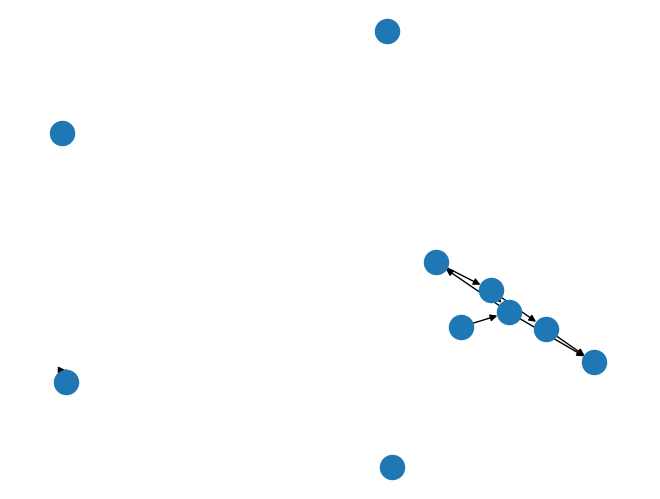

In [4]:
G = nx.DiGraph(np.array(A))
# G = nx.from_numpy_array(A)
nx.draw(G)

# File Generation

In [24]:
# Function for generating a CSV file containing an Erdos-Renyi network
def erdos_reyni_csv_generator(num_nodes, probability, ERY_filename):
    
    if os.path.exists(ERY_filename):
        print(f"The file {ERY_filename} already exists. Skipping CSV Generation.")
        return
    
    G = nx.erdos_renyi_graph(num_nodes, probability)
    with open(ERY_filename, 'w', newline='') as file:
        writer = csv.writer(file)
        for edge in G.edges:
            # file.write(f"{edge[0]},{edge[1]}\n")
            writer.writerow(edge)

# Example usage: Generate an Erdos-Renyi graph with  nodes and edge probability 0.5 and save it to erdos_reyni_network.csv

num_nodes = 10_000
probability = 0.3

ERY_filename = f'erdos_reyni_network_{num_nodes}.csv'
erdos_reyni_csv_generator(num_nodes, probability, ERY_filename)
print(f"Erdos-Renyi graph generated with {num_nodes} nodes and edge probability {probability}, saved to {ERY_filename}!")

Erdos-Renyi graph generated with 10000 nodes and edge probability 0.3, saved to erdos_reyni_network_10000.csv!


In [36]:
# Function for generating a Barabasi-Albert network in CSV format
def barabasi_albert_csv_generator(num_nodes, num_edges_to_attach, BA_filename):
    
    if os.path.exists(BA_filename):
        print(f"The file {BA_filename} already exists. Skipping CSV Generation.")
        return
    
    G = nx.barabasi_albert_graph(num_nodes, num_edges_to_attach)
    with open(BA_filename, 'w', newline='') as file:
        writer = csv.writer(file)
        for edge in G.edges:
            writer.writerow(edge)

# Example usage:
num_nodes = 1000  # Number of nodes in the network
num_edges_to_attach = 3  # Number of edges to attach from a new node to existing nodes
BA_filename = f"barabasi_albert_network_{num_nodes}.csv"  # Output filename

barabasi_albert_csv_generator(num_nodes, num_edges_to_attach, BA_filename)
print(f"Barabási-Albert network with {num_nodes} nodes and {num_edges_to_attach} edges to attach saved to {BA_filename}.")

Barabási-Albert network with 1000 nodes and 3 edges to attach saved to barabasi_albert_network_1000.csv.


In [37]:
# Generate a Watts-Strogatz network in CSV format
def watts_strogatz_csv_generator(num_nodes, k, p, WS_filename):
    
    if os.path.exists(WS_filename):
        print(f"The file {WS_filename} already exists. Skipping CSV Generation.")
        return
    
    G = nx.watts_strogatz_graph(num_nodes, k, p)
    with open(WS_filename, 'w', newline='') as file:
        writer = csv.writer(file)
        for edge in G.edges:
            writer.writerow(edge)

# Example usage:
num_nodes = 5000  # Number of nodes in the network
k = 4  # Each node is connected to k nearest neighbors in a ring topology
p = 0.1  # Probability of rewiring each edge
WS_filename = f"watts_strogatz_network_{num_nodes}.csv"  # Output filename

watts_strogatz_csv_generator(num_nodes, k, p, WS_filename)
print(f"Watts-Strogatz network with {num_nodes} nodes, k={k}, and p={p} saved to {WS_filename}.")

Watts-Strogatz network with 5000 nodes, k=4, and p=0.1 saved to watts_strogatz_network_5000.csv.


# Simulation 

# Chat GPT Prompt

In [45]:
import random

# Reading the above network generated file 
def load_graph_from_csv(filename):
    """
    Reads a Graph from above generated csv file
    """
    G = nx.Graph()
    with open(filename, 'r') as file:
        reader = csv.reader(file)
        for row in reader:
            node1, node2 = row
            G.add_edge(node1, node2)
    return G

# A function to simulate the infection process
def simulate_infection(graph, p_infect, initial_infected):
    """
    Args:
    graph: The network graph.
    p_infect: The probability of infecting an unifected node.
    infected_nodes: List of initial infected nodes.

    Returns:
    rounds: time taken to infect nodes in each simulation.
    a list of infection nodes in each simulation.
    """
    infected = set(initial_infected) # set to allow no duplicates
    infection_history = [list(infected)]
    rounds = 0
    while len(infected) < len(graph.nodes):
        new_infected = set()
        for node in list(infected):
            neighbors = list(graph.neighbors(node))
            # random.shuffle(neighbors)
            for neighbor in neighbors:
                if neighbor not in infected and random.random() < p_infect:
                    new_infected.add(neighbor)

        infected.update(new_infected)
        infection_history.append(list(new_infected))
        rounds += 1
    return rounds, infection_history

# Simultaneous cure and infection with defense
def simultaneous_infection_with_defense(graph, p_infect, p_defense, initial_infected, initial_cured):
    """
    Simulates worm propagation with defense on the graph for a certain number of rounds.

    Args:
    graph: The network graph.
    p_infection: The probability of infecting an uninfected node.
    p_defense: The probability of inoculating/curing a node.
    infected_nodes: List of initial infected nodes.
    initial_defense_node: The initial node from which defense starts.
    """
    infected = set(initial_infected)
    cured = set(initial_cured)
    infection_history = [list(infected)]
    cured_history = [list(cured)]
    rounds = 0
    while len(infected) < len(graph.nodes):
        newly_infected = set()
        newly_cured = set()
        
        for node in list(infected):
            neighbors = list(graph.neighbors(node))
            # random.shuffle(neighbors)
            for neighbor in neighbors:
                if neighbor not in infected and random.random() < p_infect:
                    newly_infected.add(neighbor)
        
        for node in list(cured) + list(infected):
            neighbors = list(graph.neighbors(node))
            # random.shuffle(neighbors)
            for neighbor in neighbors:
                if neighbor in infected and neighbor not in cured and random.random() < p_defense:
                    newly_cured.add(neighbor)
                    newly_infected.discard(neighbor)

        infected.update(newly_infected)
        cured.update(newly_cured)
        infected -= newly_cured

        infection_history.append(list(newly_infected))
        cured_history.append(list(newly_cured))

        rounds+=1
        
    return rounds, infection_history, cured_history

# Gemini Prompt

In [37]:
import networkx as nx
import random

def read_graph(filename):
  """
  Reads a graph from a CSV file.
  """
  G = nx.Graph()
  with open(filename, 'r') as f:
    for line in f:
      node1, node2 = line.strip().split(',')
      G.add_edge(int(node1), int(node2))
  return G

def simulate_infection_defense(G, p_infection, p_defense, infected_nodes, initial_defense_node, rounds=1000):
  """
  Simulates worm propagation with defense on the graph for a certain number of rounds.

  Args:
    G: The network graph.
    p_infection: The probability of infecting an uninfected node.
    p_defense: The probability of inoculating/curing a node.
    infected_nodes: List of initial infected nodes.
    initial_defense_node: The initial node from which defense starts.
    rounds: The maximum number of rounds to simulate.

  Returns:
    A tuple: (rounds to reach a stable state, list of infected nodes per round)
  """
  infected_per_round = [len(infected_nodes)]
  defense_queue = [initial_defense_node]
  defended_nodes = set(defense_queue)

  for _ in range(rounds):
    new_infected = []
    new_defended = []
    for node in infected_nodes:
      for neighbor in G.neighbors(node):
        if random.random() < p_infection and neighbor not in infected_nodes:
          new_infected.append(neighbor)

    for node in defense_queue:
      for neighbor in G.neighbors(node):
        if random.random() < p_defense and neighbor not in defended_nodes:
          new_defended.append(neighbor)
          if neighbor in infected_nodes:
            infected_nodes.remove(neighbor)  # Cure infected node

    infected_nodes.extend(new_infected)
    defense_queue.extend(new_defended)
    defended_nodes.update(new_defended)
    infected_per_round.append(len(infected_nodes))

    # Check for stable state (no change in infected or defended nodes)
    if infected_per_round[-1] == infected_per_round[-2] and \
       len(defense_queue) == len(set(defense_queue)):
      return rounds, infected_per_round

  return f"No stable state in {rounds} rounds", infected_per_round

def main():
  """
  Main function to read input and run simulation.
  """
  graph_file = input("Enter graph file name: ")
  p_infection = float(input("Enter infection probability (0-1): "))
  p_defense = float(input("Enter defense probability (0-1): "))
  infected_nodes = [int(x) for x in input("Enter initial infected nodes (comma-separated): ").split(',')]
  initial_defense_node = int(input("Enter initial defense node: "))

  G = read_graph(graph_file)
  stable_in, infected_per_round = simulate_infection_defense(G.copy(), p_infection, p_defense, 
                                                              infected_nodes.copy(), initial_defense_node)
  print(f"Stable state reached in {stable_in}.")

  # Print infected nodes per round for further analysis (optional)
  print("Infected nodes per round:", infected_per_round)

if __name__ == "__main__":
  main()

Stable state reached in No stable state in 1000 rounds.
Infected nodes per round: [2, 6, 23, 80, 225, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250

# Chat GPT prompt's main function

Simulation 1:
 Round 1: ['900', '450', '780', '23', '560']
 Round 2: ['581', '568', '278', '258', '131', '276', '510', '73', '10', '16', '371', '840', '156', '686', '492', '296', '76', '18', '997', '117', '730']
 Round 3: ['497', '175', '164', '1', '62', '675', '684', '74', '59', '519', '64', '362', '506', '35', '200', '2', '453', '857', '467', '545', '572', '874', '66', '369', '152', '841', '201', '288', '394', '187', '273', '376', '942', '24', '910', '269', '687', '38', '712', '902', '669', '404', '657', '68', '0', '990', '630', '286', '869', '578', '778', '15', '285', '447', '358', '983', '193', '47', '109', '702', '788', '707', '803', '926', '799', '149', '602', '89', '475', '215', '7', '219', '434', '268', '227', '349', '50', '205', '514', '353', '528', '377', '978', '235', '375', '824', '646', '893', '82', '259', '19', '218', '501', '311', '36', '421', '613', '6', '90', '697', '298', '137', '894', '13', '194', '297', '949', '8', '167', '183', '208', '80', '54', '425', '292', '30'

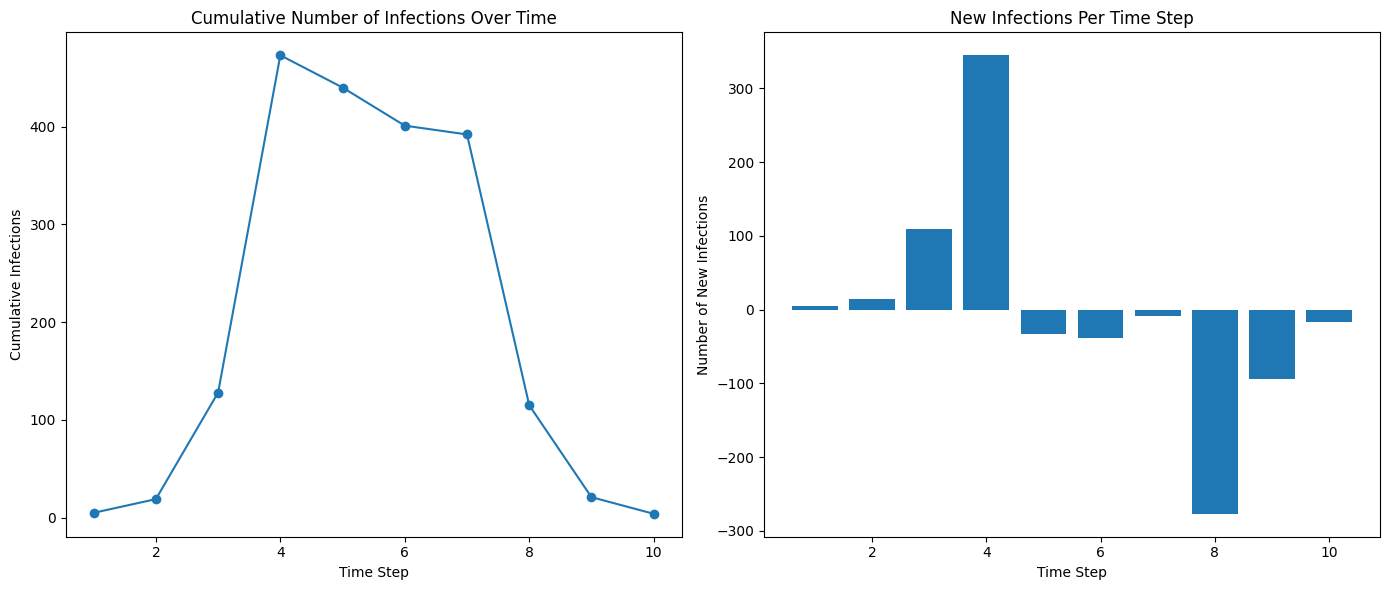

Average time taken to infect all nodes with defense mechanism: 9.133333333333333


In [46]:
# Main function to run the simulation
def main():
    """
    Main function to read input and run simulation.
    """
    # Program 1 Inputs
    filename = input("Enter the filename of the CSV file for the graph: ") # first input
    p_infect = float(input("Enter the probability value of the worm infecting an uninfected node (p_infect): "))  # second input
    initial_infected = input("Enter the initial infected node(s) separated by commas: ").split(',') # third input

    # Program 2 Inputs
    p_defense = float(input("Enter the probability value of a node getting inoculated or cured (p_defense): "))
    initial_cured = input("Enter the initial cured node(s) separated by commas: ").split(',')
    
    graph = load_graph_from_csv(filename)

    num_simulations = 15
    total_time = 0
    for i in range(num_simulations):
        # time_taken, infection_history = simulate_infection(graph, p_infect, initial_infected)
        time_taken, infection_history, cured_history = simultaneous_infection_with_defense(graph, p_infect, p_defense, initial_infected, initial_cured)

        total_time += time_taken
        print(f"Simulation {i+1}:")
        for round, infected_nodes in enumerate(infection_history, start=1):
            print(f" Round {round}: {infected_nodes}")
    
    """
    Deliverable (a)
    """
    # Prepare data for plotting
    cumulative_infections = [len(infected_nodes) for infected_nodes in infection_history]
    new_infections = [cumulative_infections[0]] + [cumulative_infections[i] - cumulative_infections[i-1] for i in range(1, len(cumulative_infections))]

    # Plotting
    plt.figure(figsize=(14, 6))

    # Cumulative infections plot
    plt.subplot(1, 2, 1)
    plt.plot(range(1, len(cumulative_infections)+1), cumulative_infections, marker='o')
    plt.title('Cumulative Number of Infections Over Time')
    plt.xlabel('Time Step')
    plt.ylabel('Cumulative Infections')

    # New infections per time step plot
    plt.subplot(1, 2, 2)
    plt.bar(range(1, len(new_infections)+1), new_infections)
    plt.title('New Infections Per Time Step')
    plt.xlabel('Time Step')
    plt.ylabel('Number of New Infections')

    plt.tight_layout()
    plt.show()

    average_time = total_time / num_simulations
    # print("Average time taken to infect all nodes: ", average_time)
    print("Average time taken to infect all nodes with defense mechanism:", average_time)

if __name__ == "__main__":
    main()

1. Erdos-Reyni Network showed uniform spread to their random nature.
2. Barabasi-Albert Network with free-scale properties, exhibited faster initial spread due to the presence of highly connected nodes.
3. Watts-Strogatz Network demonstrated a mix of behaviours due to their small-world properties, with rapid spread within local clusters(rings) but slower spread between them

The rate absolutely depdends on the type of network.


TODO - 
1. Different test cases
2. graph visualizations
3. Analysis Report

# Deliverable A